In [33]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.fft import fft, fftfreq
from math import pi
from scipy import stats 

In [34]:
N = 1000
dx = 0.001

x = np.linspace(-N/2*dx, (N/2-1)*dx, N, endpoint=False)
x = np.reshape(x, (N, 1))
print(np.shape(x))
b1,b2,b3 = np.random.uniform(0,2*pi,3)
# y = np.exp(-x**2)
# y = np.sin(2*pi*x) + 2*np.sin(10*2*pi*x) + 3*np.sin(20*2*pi*x) + 4*np.sin(30*2*pi*x)
y = np.sin(x) + np.sin(10*x+b1) + np.sin(20*x+b2) + np.sin(30*x+b3)
y = np.reshape(y, (N, 1))

(1000, 1)


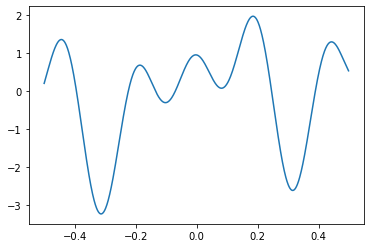

In [35]:
plt.plot(x, y)
plt.show()

In [38]:
# calculate f_p

px = 1/2/pi
# px = stats.norm.pdf(x, loc=0, scale=1) # write the  function 
# print(len(px))
# plt.plot(x, px)
fp = np.sqrt(px) * (y - np.mean(y))

In [39]:
# method 1: Fourier transform 

1000


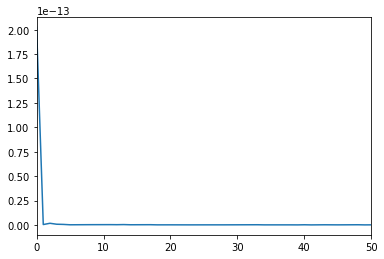

In [40]:
# discrete fourier transform 

def fft1(gn):
    N = len(gn)
    t = np.linspace(0, 1.0, N)
    k = np.linspace(-N/2, N/2-1, N)
    f = np.arange(N, dtype=complex)
    
    for index in k:
        index = int(index)
        f[index]=complex(np.sum(np.cos(2*np.pi*index*t)*gn), -np.sum(np.sin(2*np.pi*index*t)*gn))
    return f

yf1 = fft1(fp)
print(len(yf1))
xf = fftfreq(N,dx)[:N//2]

plt.plot(xf, 2.0/N * np.abs(yf1[0:N//2]))
plt.xlim(0,50)
plt.show()

1000


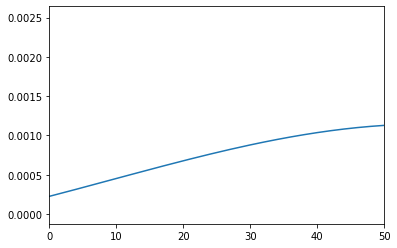

In [41]:
# fast Fourier transform

yf = fft(fp)
print(len(yf))

plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.xlim(0,50)
plt.show()

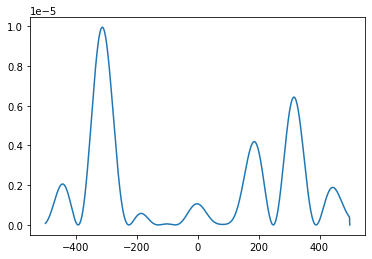

In [42]:
# the minimization function 

dw = 2*pi/N/dx 
K = np.linspace(-N/2, N/2-1, N)
K = np.reshape(K, (N, 1))
# print(len(K))
exp_k = np.array(np.zeros(N), dtype = complex)

for i in range(len(K)-1): 
    # print(K[i])
    exp_k[i] = complex(np.cos(K[i]*pi), -np.sin(K[i]*pi))
    # print(Fp)
    
yf = np.reshape(yf, (N,1))
exp_k = np.reshape(exp_k, (N,1))
f2 = np.abs(yf * exp_k * dx)**2 * dw

plt.plot(K,f2)
plt.show()

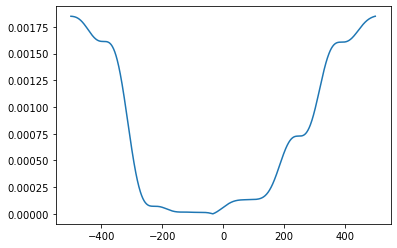

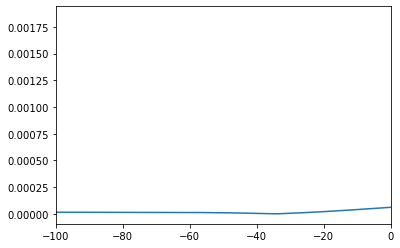

In [43]:
def func(k): 
    k = int(k + N/2) 
    if k==0: 
        low = f2[0]
        high = sum(f2[1:N-1])
    elif k==N-1:
        low = sum(f2[0:N-1])
        high = 0 
    else:
        low = sum(f2[0:k])
        high = sum(f2[k+1:N-1])
    f = np.abs(low-high)
    return f

n0 = np.linspace(1, N, N)
f0 = np.zeros(N)
for k in K:
    i = k + N/2
    i = int(i)
    f0[i] = func(k)

plt.plot(K, f0)
plt.show()

plt.plot(K, f0)
plt.xlim(-100,0)
plt.show()


In [44]:
# calculate the cut-off w0

f_min = min(f0)
print(f_min)

w0 = np.argmin(f0) - N/2
print(w0)

1.356562925285262e-07
-35.0


In [45]:
with open('my_x_data.npy', 'wb') as fs:
    np.save(fs, x)

with open('my_x_data.npy', 'rb') as fs:
    x = np.load(fs)

In [46]:
import tensorflow as tf 
from tensorflow import keras 

In [47]:
seed = 2022 
np.random.seed(seed)
x_train = np.random.normal(0, 1, 1000)
print(x_train[1:5])

seed = 2022 
np.random.seed(seed)
x_train = np.random.normal(0, 1, 1000)
print(x_train[1:5])

[-0.27490142 -0.13928556  1.98468616  0.28210933]
[-0.27490142 -0.13928556  1.98468616  0.28210933]


In [48]:
# training the function with NN 

seed = 2022 
np.random.seed(seed)
# random sample from U(-pi,pi)
x_train = np.random.uniform(-pi,pi,512)
# x_train = np.random.normal(0, 1, 1000)
y_train = np.sin(x_train) + np.sin(10*x_train+b1) + np.sin(20*x_train+b2) + np.sin(30*x_train+b3)
# y_train = np.sin(2*pi*x_train) + 2*np.sin(10*2*pi*x_train) + 3*np.sin(20*2*pi*x_train) + 4*np.sin(30*2*pi*x_train)

# reshaping 
x_train = x_train.reshape((len(x_train), 1))
# print(len(x_train))
y_train = y_train.reshape((len(y_train), 1))
# print(len(y_train))

In [49]:
# define the keras model 
K = 64
input_layer = keras.Input(shape = (1, ))
hidden_layer_1 = keras.layers.Dense(units = K, 
                                    activation = 'sigmoid')
hidden_layer_2 = keras.layers.Dense(units = K, 
                                    activation = 'sigmoid')
hidden_layer_3 = keras.layers.Dense(units = K, 
                                    activation = 'sigmoid')
hidden_layer_4 = keras.layers.Dense(units = K, 
                                    activation = 'sigmoid')
hidden_layer_5 = keras.layers.Dense(units = K, 
                                    activation = 'sigmoid')
output_layer = keras.layers.Dense(units = 1, 
                                    use_bias = False)
model = keras.Sequential([input_layer, hidden_layer_1,
                          hidden_layer_2, hidden_layer_3, 
                          hidden_layer_4, hidden_layer_5, 
                          output_layer])

# compling the model 
adam = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer = 'adam', loss = 'mse')

In [50]:
def SB_epoch(n_epoch): 
    # fitting the data 
    tf.random.set_seed(seed)
    beta = model.fit(x_train, y_train, epochs=n_epoch, batch_size=32)

    # predicting the data
    predict_1 = model.predict(x)
    # print(np.shape(predict_1))

    # compute r
    predict_1 = np.reshape(predict_1, (N,1))
    r = y - predict_1
    # print(np.shape(r))

    plt.plot(x, y, color='black')
    plt.plot(x, predict_1, color='green')
    plt.plot(x, r, color='red')
    plt.show()

    # calculate r_p
    r_mean = r - np.mean(r)
    r_mean = np.reshape(r_mean, (N, 1))
    rp = np.sqrt(px) * r_mean
    # print(np.shape(rp))

    # Fourier transform 
    rf = fft(rp)
    rf = np.reshape(rf, (N, 1))

    # compute sum_low
    r2 = np.abs(rf * exp_k * dx)**2 * dw
    r_sum_low = sum(r2[0:int(w0 + N/2)])
    # print(r_sum_low)

    # compute SB
    a = r_sum_low
    b = sum(f2)
    e_low = a/b 
    # print(e_low)

    var_r = np.var(r)
    var_f = np.var(y)
    FVU = var_r/var_f 
    # print(FVU)
    SB = (FVU - 2*e_low)/FVU
    print(SB)
    return SB

Epoch 1/10
16/16 [==============================] - 0s 834us/step - loss: 2.6988
Epoch 2/10
16/16 [==============================] - 0s 887us/step - loss: 2.3155
Epoch 3/10
16/16 [==============================] - 0s 894us/step - loss: 2.2356
Epoch 4/10
16/16 [==============================] - 0s 949us/step - loss: 2.2368
Epoch 5/10
16/16 [==============================] - 0s 771us/step - loss: 2.2343
Epoch 6/10
16/16 [==============================] - 0s 746us/step - loss: 2.2299
Epoch 7/10
16/16 [==============================] - 0s 776us/step - loss: 2.2345
Epoch 8/10
16/16 [==============================] - 0s 1ms/step - loss: 2.2330
Epoch 9/10
16/16 [==============================] - 0s 841us/step - loss: 2.2193
Epoch 10/10
16/16 [==============================] - 0s 953us/step - loss: 2.2140


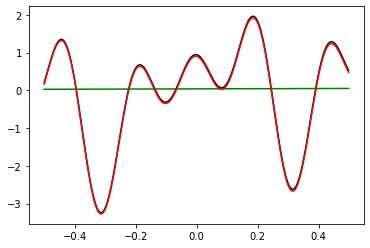

[0.00111575]


array([0.00111575])

In [51]:
SB_epoch(10)

Epoch 1/20
16/16 [==============================] - 0s 829us/step - loss: 2.1841
Epoch 2/20
16/16 [==============================] - 0s 732us/step - loss: 2.1264
Epoch 3/20
16/16 [==============================] - 0s 733us/step - loss: 2.0238
Epoch 4/20
16/16 [==============================] - 0s 790us/step - loss: 1.8772
Epoch 5/20
16/16 [==============================] - 0s 915us/step - loss: 1.7404
Epoch 6/20
16/16 [==============================] - 0s 906us/step - loss: 1.6770
Epoch 7/20
16/16 [==============================] - 0s 719us/step - loss: 1.6923
Epoch 8/20
16/16 [==============================] - 0s 886us/step - loss: 1.6886
Epoch 9/20
16/16 [==============================] - 0s 793us/step - loss: 1.6739
Epoch 10/20
16/16 [==============================] - 0s 1ms/step - loss: 1.6629
Epoch 11/20
16/16 [==============================] - 0s 983us/step - loss: 1.6570
Epoch 12/20
16/16 [==============================] - 0s 712us/step - loss: 1.6547
Epoch 13/20
16/16 [========

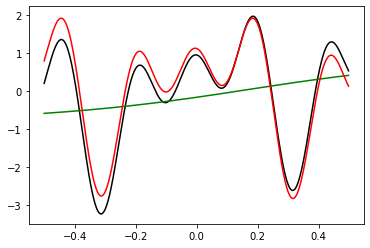

[0.04878948]


array([0.04878948])

In [52]:
SB_epoch(20)

Epoch 1/20
16/16 [==============================] - 0s 1ms/step - loss: 1.6477
Epoch 2/20
16/16 [==============================] - 0s 927us/step - loss: 1.6455
Epoch 3/20
16/16 [==============================] - 0s 663us/step - loss: 1.6399
Epoch 4/20
16/16 [==============================] - 0s 985us/step - loss: 1.6444
Epoch 5/20
16/16 [==============================] - 0s 712us/step - loss: 1.6433
Epoch 6/20
16/16 [==============================] - 0s 1ms/step - loss: 1.6432
Epoch 7/20
16/16 [==============================] - 0s 724us/step - loss: 1.6538
Epoch 8/20
16/16 [==============================] - 0s 851us/step - loss: 1.6510
Epoch 9/20
16/16 [==============================] - 0s 775us/step - loss: 1.6467
Epoch 10/20
16/16 [==============================] - 0s 632us/step - loss: 1.6409
Epoch 11/20
16/16 [==============================] - 0s 1ms/step - loss: 1.6373
Epoch 12/20
16/16 [==============================] - 0s 1ms/step - loss: 1.6388
Epoch 13/20
16/16 [==============

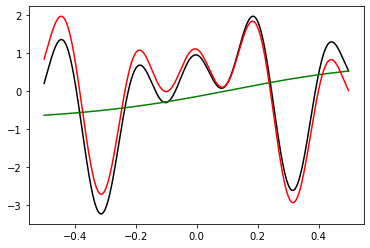

[0.06246071]
Epoch 1/100
16/16 [==============================] - 0s 831us/step - loss: 1.6404
Epoch 2/100
16/16 [==============================] - 0s 913us/step - loss: 1.6379
Epoch 3/100
16/16 [==============================] - 0s 823us/step - loss: 1.6338
Epoch 4/100
16/16 [==============================] - 0s 1ms/step - loss: 1.6387
Epoch 5/100
16/16 [==============================] - 0s 799us/step - loss: 1.6374
Epoch 6/100
16/16 [==============================] - 0s 1ms/step - loss: 1.6381
Epoch 7/100
16/16 [==============================] - 0s 843us/step - loss: 1.6480
Epoch 8/100
16/16 [==============================] - 0s 1ms/step - loss: 1.6446
Epoch 9/100
16/16 [==============================] - 0s 753us/step - loss: 1.6422
Epoch 10/100
16/16 [==============================] - 0s 854us/step - loss: 1.6366
Epoch 11/100
16/16 [==============================] - 0s 914us/step - loss: 1.6335
Epoch 12/100
16/16 [==============================] - 0s 1ms/step - loss: 1.6354
Epoch 13

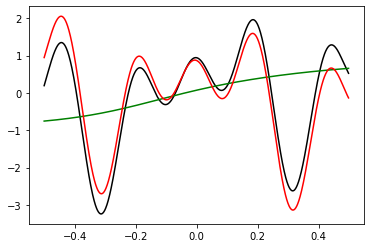

[0.05272535]
Epoch 1/500
16/16 [==============================] - 0s 783us/step - loss: 1.6105
Epoch 2/500
16/16 [==============================] - 0s 828us/step - loss: 1.6132
Epoch 3/500
16/16 [==============================] - 0s 1ms/step - loss: 1.6080
Epoch 4/500
16/16 [==============================] - 0s 681us/step - loss: 1.6113
Epoch 5/500
16/16 [==============================] - 0s 1ms/step - loss: 1.6091
Epoch 6/500
16/16 [==============================] - 0s 772us/step - loss: 1.6092
Epoch 7/500
16/16 [==============================] - 0s 946us/step - loss: 1.6140
Epoch 8/500
16/16 [==============================] - 0s 862us/step - loss: 1.6083
Epoch 9/500
16/16 [==============================] - 0s 977us/step - loss: 1.6064
Epoch 10/500
16/16 [==============================] - 0s 1ms/step - loss: 1.5965
Epoch 11/500
16/16 [==============================] - 0s 819us/step - loss: 1.5927
Epoch 12/500
16/16 [==============================] - 0s 733us/step - loss: 1.5913
Epoch 

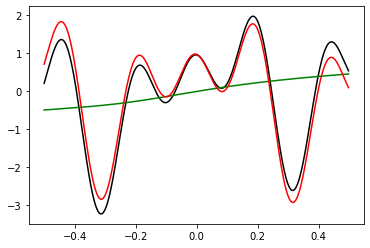

[0.04394478]
Epoch 1/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.4612
Epoch 2/1000
16/16 [==============================] - 0s 1ms/step - loss: 1.4545
Epoch 3/1000
16/16 [==============================] - 0s 990us/step - loss: 1.4521
Epoch 4/1000
16/16 [==============================] - 0s 1ms/step - loss: 1.4568
Epoch 5/1000
16/16 [==============================] - 0s 903us/step - loss: 1.4533
Epoch 6/1000
16/16 [==============================] - 0s 1ms/step - loss: 1.4551
Epoch 7/1000
16/16 [==============================] - 0s 934us/step - loss: 1.4619
Epoch 8/1000
16/16 [==============================] - 0s 1ms/step - loss: 1.4577
Epoch 9/1000
16/16 [==============================] - 0s 828us/step - loss: 1.4628
Epoch 10/1000
16/16 [==============================] - 0s 1ms/step - loss: 1.4501
Epoch 11/1000
16/16 [==============================] - 0s 998us/step - loss: 1.4510
Epoch 12/1000
16/16 [==============================] - 0s 989us/step - loss: 1.4518


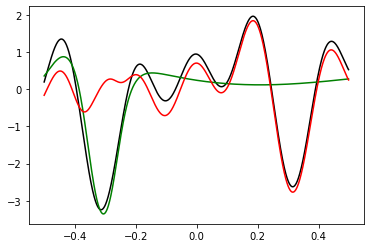

[0.86229779]
Epoch 1/2000
16/16 [==============================] - 0s 913us/step - loss: 1.0109
Epoch 2/2000
16/16 [==============================] - 0s 1ms/step - loss: 1.0099
Epoch 3/2000
16/16 [==============================] - 0s 806us/step - loss: 1.0054
Epoch 4/2000
16/16 [==============================] - 0s 1ms/step - loss: 1.0106
Epoch 5/2000
16/16 [==============================] - 0s 762us/step - loss: 1.0211
Epoch 6/2000
16/16 [==============================] - 0s 935us/step - loss: 1.0231
Epoch 7/2000
16/16 [==============================] - 0s 902us/step - loss: 1.0549
Epoch 8/2000
16/16 [==============================] - 0s 985us/step - loss: 1.0352
Epoch 9/2000
16/16 [==============================] - 0s 1ms/step - loss: 1.0169
Epoch 10/2000
16/16 [==============================] - 0s 977us/step - loss: 1.0094
Epoch 11/2000
16/16 [==============================] - 0s 997us/step - loss: 1.0036
Epoch 12/2000
16/16 [==============================] - 0s 929us/step - loss: 0

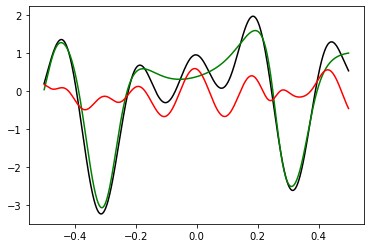

[0.34380354]
Epoch 1/3000
16/16 [==============================] - 0s 862us/step - loss: 0.5025
Epoch 2/3000
16/16 [==============================] - 0s 1ms/step - loss: 0.5126
Epoch 3/3000
16/16 [==============================] - 0s 741us/step - loss: 0.5072
Epoch 4/3000
16/16 [==============================] - 0s 909us/step - loss: 0.5007
Epoch 5/3000
16/16 [==============================] - 0s 792us/step - loss: 0.5126
Epoch 6/3000
16/16 [==============================] - 0s 876us/step - loss: 0.5364
Epoch 7/3000
16/16 [==============================] - 0s 948us/step - loss: 0.5438
Epoch 8/3000
16/16 [==============================] - 0s 965us/step - loss: 0.5134
Epoch 9/3000
16/16 [==============================] - 0s 995us/step - loss: 0.5112
Epoch 10/3000
16/16 [==============================] - 0s 695us/step - loss: 0.5301
Epoch 11/3000
16/16 [==============================] - 0s 814us/step - loss: 0.5168
Epoch 12/3000
16/16 [==============================] - 0s 935us/step - los

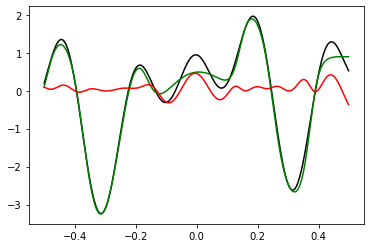

[0.41378358]
Epoch 1/4000
16/16 [==============================] - 0s 1ms/step - loss: 0.3820
Epoch 2/4000
16/16 [==============================] - 0s 861us/step - loss: 0.3894
Epoch 3/4000
16/16 [==============================] - 0s 1ms/step - loss: 0.3914
Epoch 4/4000
16/16 [==============================] - 0s 857us/step - loss: 0.3900
Epoch 5/4000
16/16 [==============================] - 0s 1ms/step - loss: 0.3858
Epoch 6/4000
16/16 [==============================] - 0s 862us/step - loss: 0.3912
Epoch 7/4000
16/16 [==============================] - 0s 908us/step - loss: 0.3948
Epoch 8/4000
16/16 [==============================] - 0s 738us/step - loss: 0.3859
Epoch 9/4000
16/16 [==============================] - 0s 959us/step - loss: 0.3956
Epoch 10/4000
16/16 [==============================] - 0s 1ms/step - loss: 0.3978
Epoch 11/4000
16/16 [==============================] - 0s 717us/step - loss: 0.3885
Epoch 12/4000
16/16 [==============================] - 0s 940us/step - loss: 0.3

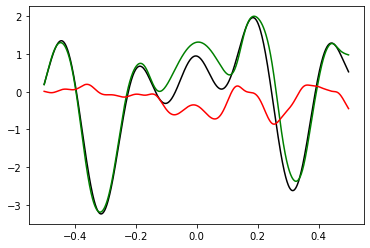

[0.41039405]


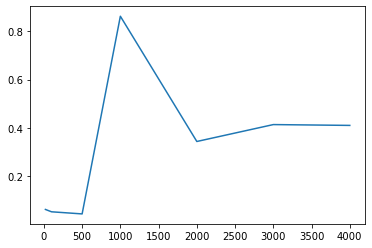

In [53]:
epoch_list = np.array([20, 100, 500, 1000, 2000, 3000, 4000], dtype='int')

i=0
SB_list = np.zeros(7)
for epoch in epoch_list: 
    SB_list[i] = SB_epoch(epoch)
    i = i+1

plt.plot(epoch_list, SB_list)

Epoch 1/20
16/16 [==============================] - 0s 889us/step - loss: 0.3634
Epoch 2/20
16/16 [==============================] - 0s 878us/step - loss: 0.3540
Epoch 3/20
16/16 [==============================] - 0s 1ms/step - loss: 0.3534
Epoch 4/20
16/16 [==============================] - 0s 776us/step - loss: 0.3526
Epoch 5/20
16/16 [==============================] - 0s 912us/step - loss: 0.3539
Epoch 6/20
16/16 [==============================] - 0s 900us/step - loss: 0.3530
Epoch 7/20
16/16 [==============================] - 0s 1ms/step - loss: 0.3566
Epoch 8/20
16/16 [==============================] - 0s 973us/step - loss: 0.3577
Epoch 9/20
16/16 [==============================] - 0s 1ms/step - loss: 0.3586
Epoch 10/20
16/16 [==============================] - 0s 771us/step - loss: 0.3630
Epoch 11/20
16/16 [==============================] - 0s 796us/step - loss: 0.3769
Epoch 12/20
16/16 [==============================] - 0s 866us/step - loss: 0.3629
Epoch 13/20
16/16 [============

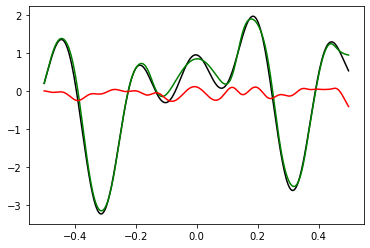

[0.28537308]


array([0.28537308])

In [54]:
SB_epoch(20)

Epoch 1/20
16/16 [==============================] - 0s 844us/step - loss: 0.3545
Epoch 2/20
16/16 [==============================] - 0s 998us/step - loss: 0.3558
Epoch 3/20
16/16 [==============================] - 0s 797us/step - loss: 0.3546
Epoch 4/20
16/16 [==============================] - 0s 800us/step - loss: 0.3552
Epoch 5/20
16/16 [==============================] - 0s 995us/step - loss: 0.3522
Epoch 6/20
16/16 [==============================] - 0s 683us/step - loss: 0.3570
Epoch 7/20
16/16 [==============================] - 0s 972us/step - loss: 0.3571
Epoch 8/20
16/16 [==============================] - 0s 737us/step - loss: 0.3542
Epoch 9/20
16/16 [==============================] - 0s 834us/step - loss: 0.3573
Epoch 10/20
16/16 [==============================] - 0s 747us/step - loss: 0.3638
Epoch 11/20
16/16 [==============================] - 0s 1ms/step - loss: 0.3808
Epoch 12/20
16/16 [==============================] - 0s 818us/step - loss: 0.3676
Epoch 13/20
16/16 [========

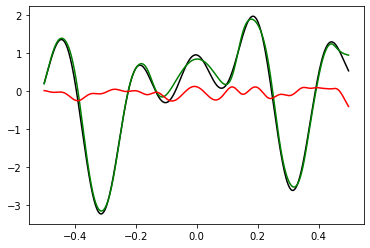

[0.30493339]


array([0.30493339])

In [55]:
SB_epoch(20)